In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train/train.csv')

# Cleaning

In [3]:
df = df.drop(columns='id')

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.shape

(90615, 9)

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# Height cannot be 0.
df = df[df["Height"] != 0]
# Whole weight grater than sum of other weights
df = df[(df["Whole weight"] > df["Whole weight.1"]+df["Whole weight.2"]+df["Shell weight"])]
# Length greater than Diameter
df = df[(df["Length"]> df["Diameter"])]
# Diameter greater than Height
df = df[(df["Diameter"] > df["Height"])]

In [9]:
df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90609,F,0.650,0.525,0.185,1.7070,0.6605,0.3545,0.4735,14
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6


In [10]:
plt.rcParams['font.size'] = 5

def plot_data_bar_plot(df, column_name, title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df, x=column_name, palette="husl")
    plt.title(f'Barplot of {column_name}', fontsize=title_size)
    plt.ylabel('Count', fontsize=axis_size)
    plt.xlabel(column_name, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_histogram(df, column_name, title_size=14, axis_size=12, tick_size=10, bins = 5):
    plt.figure(figsize=(13, 4))
    sns.histplot(df[column_name],bins = bins, color = 'orange')
    plt.title(f'Histogram of {column_name}', fontsize=title_size)
    plt.xlabel(column_name, fontsize=axis_size)
    plt.ylabel('Frequency', fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_boxplot(df, column_name1,column_name2 ,title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name1],y=df[column_name2],palette="husl")
    plt.title(f'Boxplot of {column_name1} with {column_name2}', fontsize=title_size)
    plt.xlabel(column_name1, fontsize=axis_size)
    plt.ylabel(column_name2, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_scatter(df, column_name1,column_name2 ,title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[column_name1],y=df[column_name2],palette="husl")
    plt.title(f'Boxplot of {column_name1} with {column_name2}', fontsize=title_size)
    plt.xlabel(column_name1, fontsize=axis_size)
    plt.ylabel(column_name2, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

# Categorical Variables

### Sex

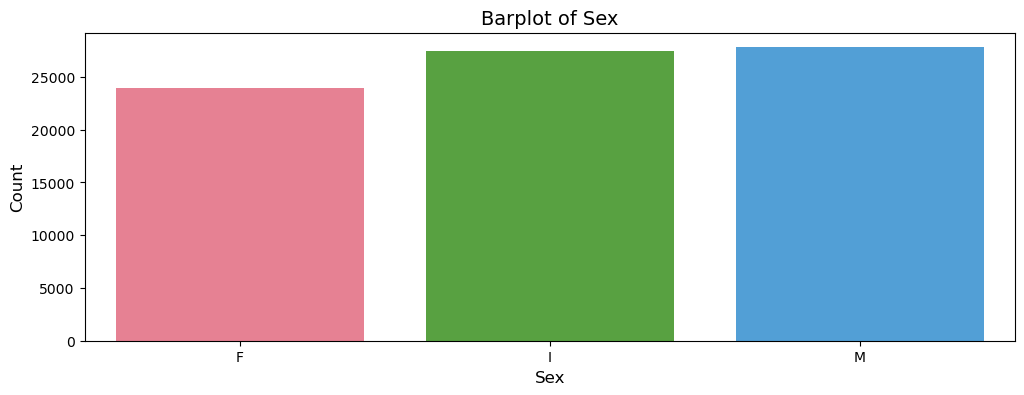

In [11]:
plot_data_bar_plot(df, 'Sex')

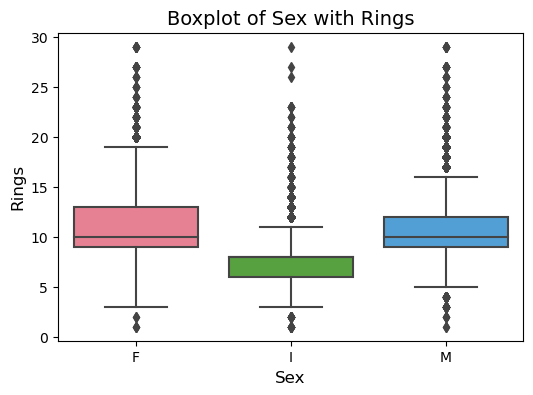

In [12]:
plot_data_boxplot(df,"Sex","Rings")

# Numerical Variables

### Distributions

<Axes: xlabel='Length', ylabel='Count'>

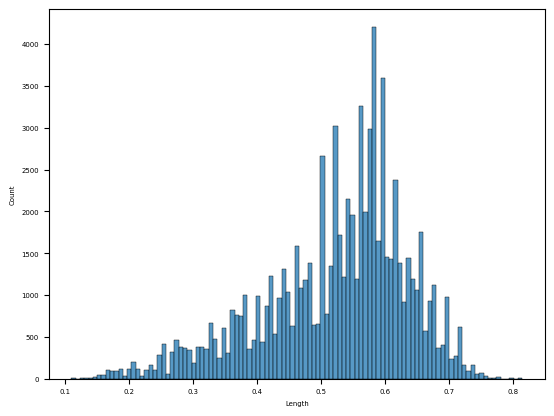

In [13]:
sns.histplot(df["Length"])

<Axes: xlabel='Diameter', ylabel='Count'>

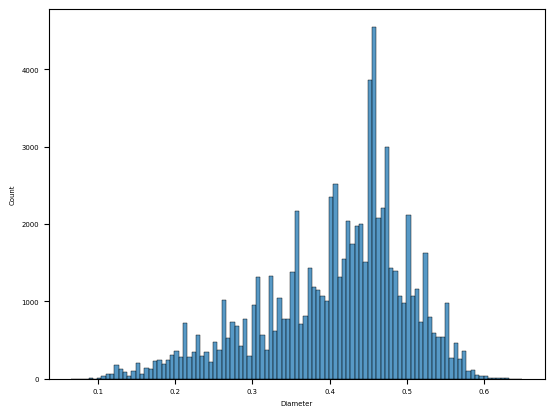

In [14]:
sns.histplot(df["Diameter"])

<Axes: xlabel='Height', ylabel='Count'>

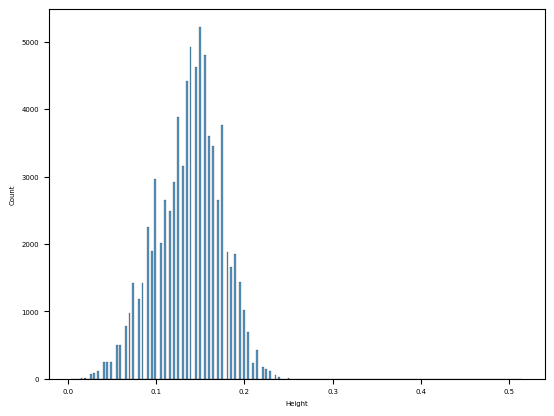

In [15]:
sns.histplot(df["Height"])

<Axes: xlabel='Whole weight', ylabel='Count'>

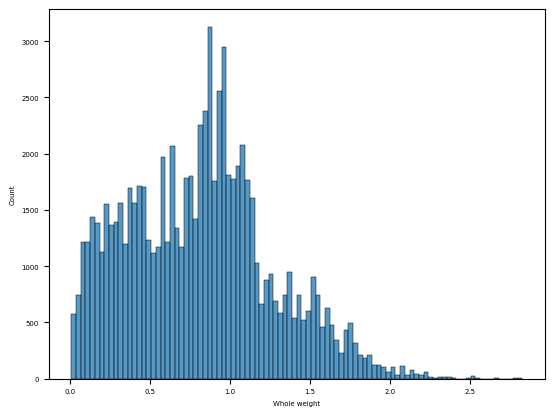

In [16]:
sns.histplot(df["Whole weight"])

<Axes: xlabel='Whole weight.1', ylabel='Count'>

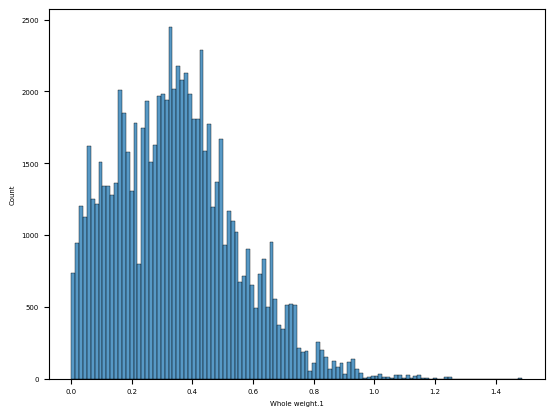

In [17]:
sns.histplot(df["Whole weight.1"])

<Axes: xlabel='Whole weight.2', ylabel='Count'>

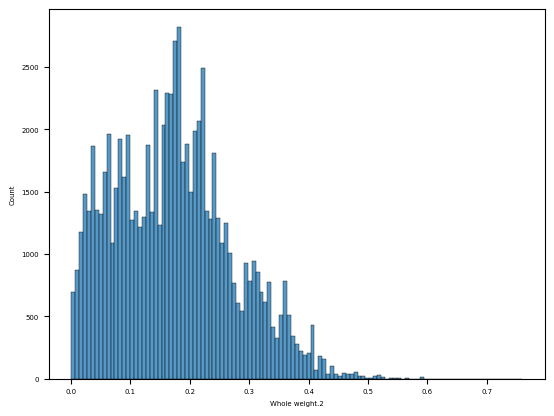

In [18]:
sns.histplot(df["Whole weight.2"])

<Axes: xlabel='Shell weight', ylabel='Count'>

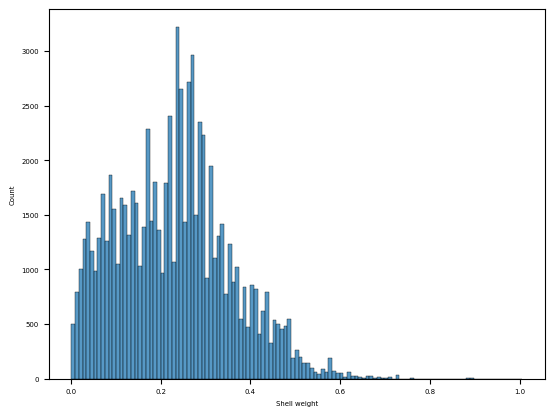

In [19]:
sns.histplot(df["Shell weight"])

# Correlations

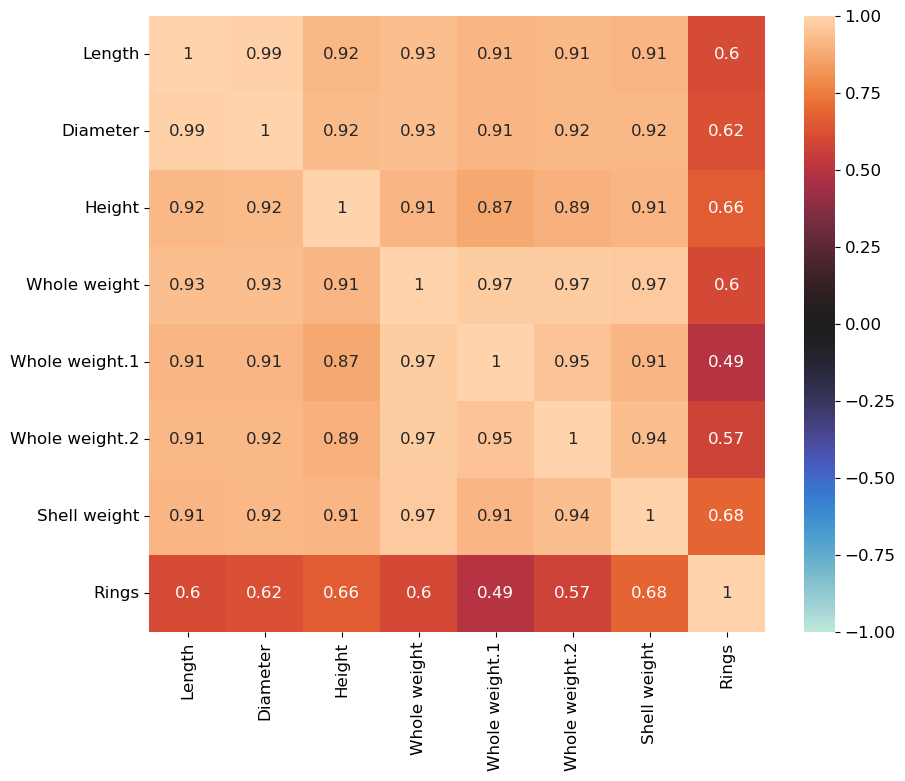

In [20]:
numericalDf = df.iloc[:,1:]

correlation_matrix = numericalDf.corr()


plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center=0, square=True)
plt.show()

# Predictor Variable

<Axes: xlabel='Rings', ylabel='Count'>

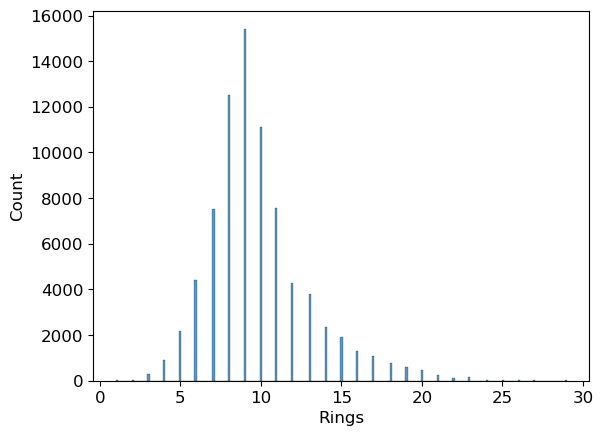

In [21]:
sns.histplot(df["Rings"])

# Anova

In [22]:
from scipy.stats import f_oneway

male = df["Rings"][df["Sex"] == "M"]
female = df["Rings"][df["Sex"] == "F"]
infi = df["Rings"][df["Sex"] == "I"]


f_statistic, p_value = f_oneway(male, female, infi)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 13691.580200983912
P-value: 0.0


# Recoded Sex

In [24]:
sexMap = {"M":0, "F":1, "I":2}

df["Sex"] = df["Sex"].map(sexMap)

# Save clean df

In [23]:
df.to_csv("../data/cleaned/cleaned.csv", index=False)